In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Adv_CV/WIDER_Project/')

In [0]:
img_array = np.load('images.npy',allow_pickle=True)

In [5]:
print('number of images in the given dataset is: ',img_array.shape[0])

number of images in the given dataset is:  409


In [6]:
for i in range(0,img_array.shape[0]):
  try:
    if img_array[i][0].shape[2]>3:
      print(i,img_array[i][0].shape)
  except:
    print(i,img_array[i][0].shape)

1 (697, 1280, 4)
3 (291, 600, 4)
41 (340, 516, 4)
49 (600, 800, 4)
64 (312, 750, 4)
140 (330, 538, 4)
151 (496, 860, 4)
247 (379, 505, 4)
263 (400, 770, 4)
272 (350, 650)
337 (267, 740, 4)
347 (281, 600, 4)


We can observe that there are few more then 3 channels images and 1 channel image, that needs to be handled for building the model

Image index number:  137


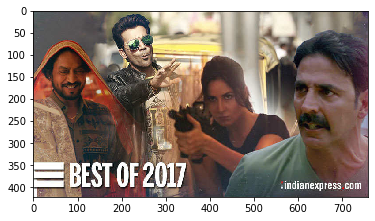

In [7]:
img_num=np.random.randint(0,img_array.shape[0])
plt.imshow(img_array[img_num][0])
print('Image index number: ',img_num)

In [8]:
img_array[img_num][1]

[{'imageHeight': 422,
  'imageWidth': 759,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.06455862977602109, 'y': 0.26540284360189575},
   {'x': 0.15678524374176547, 'y': 0.4597156398104265}]},
 {'imageHeight': 422,
  'imageWidth': 759,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.766798418972332, 'y': 0.33649289099526064},
   {'x': 0.9380764163372859, 'y': 0.6990521327014217}]},
 {'imageHeight': 422,
  'imageWidth': 759,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2648221343873518, 'y': 0.13033175355450238},
   {'x': 0.36100131752305664, 'y': 0.2890995260663507}]},
 {'imageHeight': 422,
  'imageWidth': 759,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5191040843214756, 'y': 0.4265402843601896},
   {'x': 0.6126482213438735, 'y': 0.6018957345971564}]}]

In [0]:
Data_set=[]
IMAGE_SIZE_Width=128
IMAGE_SIZE_Height=128
Data_set=[]
for j in range(0,img_array.shape[0]):
  image_name='image_'+ str(j+1)
  for i in img_array[j][1]:
    ori_Height=i['imageHeight']
    Ori_Width=i['imageWidth']
    label=i['label'][0]
    x1_ratio=i['points'][0]['x']
    x2_ratio=i['points'][1]['x']
    y1_ratio=i['points'][0]['y']
    y2_ratio=i['points'][1]['y']
    x1_ori=int((i['points'][0]['x'])*Ori_Width)
    x2_ori=int((i['points'][1]['x'])*Ori_Width)
    y1_ori=int((i['points'][0]['y'])*ori_Height)
    y2_ori=int((i['points'][1]['y'])*ori_Height)
    x_min=int((i['points'][0]['x'])*IMAGE_SIZE_Width)
    x_max=int((i['points'][1]['x'])*IMAGE_SIZE_Width)
    y_min=int((i['points'][0]['y'])*IMAGE_SIZE_Height)
    y_max=int((i['points'][1]['y'])*IMAGE_SIZE_Height)
    Data_set.append([image_name,ori_Height,Ori_Width,label,x1_ratio,x2_ratio,y1_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,y_min,x_max,y_max])


In [10]:

df=pd.DataFrame(Data_set,columns=['filename','ori_Height','Ori_Width','class','x1_ratio','x2_ratio','y1_ratio','y2_ratio','x1_ori','x2_ori','y1_ori','y2_ori','x_min','y_min','x_max','y_max'])

df.head()

,filename,ori_Height,Ori_Width,class,x1_ratio,x2_ratio,y1_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,y_min,x_max,y_max
0,image_1,333,650,Face,0.086154,0.172308,0.306306,0.453453,56,112,102,151,11,39,22,58
1,image_1,333,650,Face,0.583077,0.658462,0.291291,0.468468,379,428,97,156,74,37,84,59
2,image_2,697,1280,Face,0.705309,0.769231,0.232604,0.361829,902,984,162,252,90,29,98,46
3,image_3,240,460,Face,0.469565,0.606522,0.050000,0.333333,216,279,12,80,60,6,77,42
4,image_3,240,460,Face,0.628261,0.745652,0.008333,0.308333,289,343,2,74,80,1,95,39


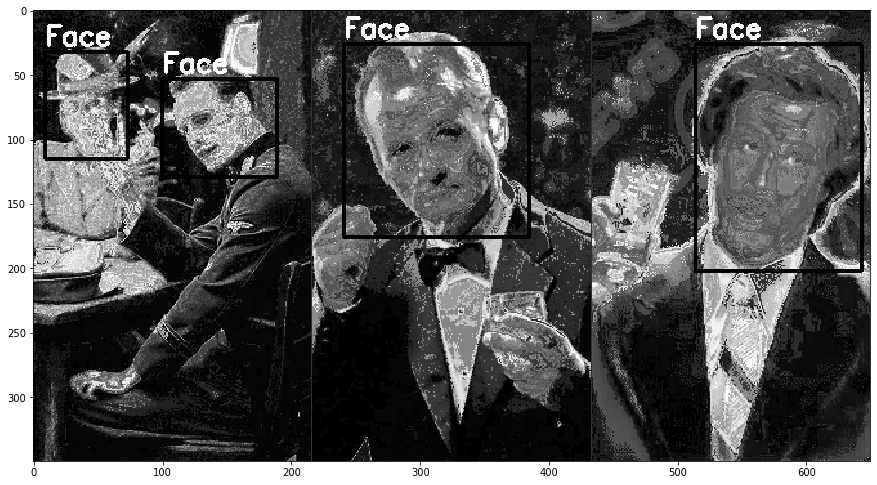

In [14]:
img_num = np.random.randint(0, df.shape[0])

img_file = df.loc[img_num,'filename']
img_loc=int(df.loc[img_num,'filename'].split('_')[1])-1
img = img_array[img_loc][0]

rows_with_file = df[df['filename'] == img_file].index.tolist()

for i in rows_with_file:
    xmin, ymin, xmax, ymax = df.loc[i, ['x1_ori', 'y1_ori', 'x2_ori', 'y2_ori']]
    label = df.loc[i, 'class']
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [15]:
img_array[12][1]

[{'imageHeight': 3423,
  'imageWidth': 5000,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.027709861450692746, 'y': 0.10357142857142858},
   {'x': 0.17277913610431947, 'y': 0.38095238095238093}]},
 {'imageHeight': 3423,
  'imageWidth': 5000,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.20048899755501223, 'y': 0.22023809523809523},
   {'x': 0.3154034229828851, 'y': 0.4845238095238095}]},
 {'imageHeight': 3423,
  'imageWidth': 5000,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.530562347188264, 'y': 0.11666666666666667},
   {'x': 0.6674816625916871, 'y': 0.40595238095238095}]},
 {'imageHeight': 3423,
  'imageWidth': 5000,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6764466177669112, 'y': 0.2904761904761905},
   {'x': 0.7685411572942136, 'y': 0.49166666666666664}]},
 {'imageHeight': 3423,
  'imageWidth': 5000,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.778321108394458, 'y': 0.1773809523809524},
   {'x': 0.9176854115729421, 'y': 

In [16]:
df[df['filename']=='image_12']

,filename,ori_Height,Ori_Width,class,x1_ratio,x2_ratio,y1_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,y_min,x_max,y_max
25,image_12,960,648,Face,0.046296,0.203704,0.163542,0.298958,30,132,157,287,5,20,26,38
26,image_12,960,648,Face,0.319444,0.557099,0.137500,0.295833,206,361,132,284,40,17,71,37
27,image_12,960,648,Face,0.564815,0.714506,0.187500,0.305208,365,462,180,293,72,24,91,39
28,image_12,960,648,Face,0.716049,0.833333,0.209375,0.306250,464,540,201,294,91,26,106,39
29,image_12,960,648,Face,0.822531,0.942901,0.231250,0.317708,533,611,222,305,105,29,120,40


In [17]:
from keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=128
IMAGE_WIDTH=128
masks=np.zeros((int(img_array.shape[0]), 4))
X_train=np.zeros((int(img_array.shape[0]),IMAGE_HEIGHT,IMAGE_WIDTH,3))
for index in range(img_array.shape[0]):
  img=img_array[index][0]
  img=cv2.resize(img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH),interpolation=cv2.INTER_CUBIC)
  try:
    img=img[:,:,:3]
  except:
    continue
  X_train[index]=preprocess_input(np.array(img,dtype=np.float32))
  masks[index,0] = x1_ori * IMAGE_WIDTH / Ori_Width
  masks[index,1] = y1_ori * IMAGE_HEIGHT / ori_Height
  masks[index,2] = x2_ori * IMAGE_WIDTH / Ori_Width
  masks[index,3] = y2_ori * IMAGE_HEIGHT / ori_Height

Using TensorFlow backend.


In [18]:
display(X_train.shape, masks.shape)

(409, 128, 128, 3)

(409, 4)

In [0]:
from PIL import Image
from keras_applications import mobilenet
from keras.applications.mobilenet import preprocess_input
from keras.backend import epsilon
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Reshape

Defineing a custum loss function IOU which calculates intersction over Union

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

In [21]:
from keras.applications.mobilenet import MobileNet
IMAGE_SIZE=128
IMG_SHAPE=(IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = MobileNet(input_shape=IMG_SHAPE,include_top=False,alpha=1.0)












17227776/17225924 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = True

In [23]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  87


In [0]:
fine_tune_at = len(base_model.layers)-6

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [25]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [0]:
X=base_model.layers[fine_tune_at].output
X=Conv2D(4,kernel_size=4)(X)
X=Reshape((4,))(X)

In [27]:
base_model=Model(inputs=base_model.input, output=X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`
  """Entry point for launching an IPython kernel.


In [28]:
import tensorflow as tf
base_model.compile(optimizer='adam',loss='mse',metrics=[IoU])


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [29]:
base_model.fit(X_train,masks,epochs=30,batch_size=32,verbose=1)



Epoch 1/30
409/409 [==============================] - 13s 31ms/step - loss: 2178.3404 - IoU: 0.1904
Epoch 2/30
409/409 [==============================] - 12s 28ms/step - loss: 402.8603 - IoU: 0.3558
Epoch 3/30
409/409 [==============================] - 12s 28ms/step - loss: 141.9484 - IoU: 0.5781
Epoch 4/30
409/409 [==============================] - 12s 29ms/step - loss: 60.1742 - IoU: 0.7162
Epoch 5/30
409/409 [==============================] - 12s 28ms/step - loss: 38.9203 - IoU: 0.7799
Epoch 6/30
409/409 [==============================] - 12s 28ms/step - loss: 29.2257 - IoU: 0.8117
Epoch 7/30
409/409 [==============================] - 12s 28ms/step - loss: 23.2603 - IoU: 0.8294
Epoch 8/30
409/409 [==============================] - 12s 28ms/step - loss: 21.1639 - IoU: 0.8429
Epoch 9/30
409/409 [==============================] - 12s 28ms/step - loss: 19.5789 - IoU: 0.8460
Epoch 10/30
409/409 [==============================] - 12s 28ms/step - loss: 18.8882 - IoU: 0.8489
Epoch 11/30
4